In [1]:
import sys
import importlib
sys.path.append('../')
import model.op
importlib.reload(model.op)
from model.op import number_aircrafts_lp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ParseLP
importlib.reload(ParseLP)
from ParseLP import convert2df, calculate_num_aircrafts

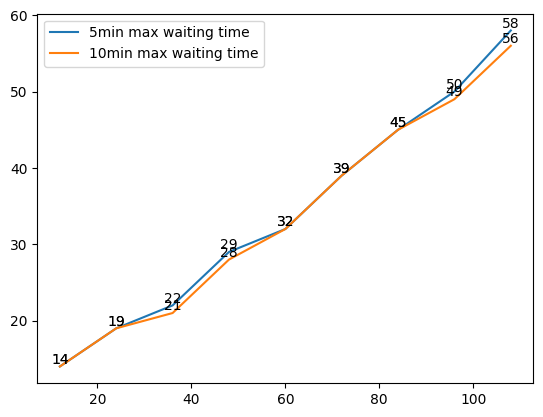

In [1]:
import matplotlib.pyplot as plt

x1 = [12, 24, 36, 48, 60, 72, 84, 96, 108]
y = [14, 19, 22, 29, 32, 39, 45, 50, 58]
z = [14, 19, 21, 28, 32, 39, 45, 49, 56]

plt.plot(x1, y, label='5min max waiting time')
plt.plot(x1, z, label='10min max waiting time')

for i, j in zip(x1, y):
    plt.text(i, j, str(j), ha='center', va='bottom')

for i, j in zip(x1, z):
    plt.text(i, j, str(j), ha='center', va='bottom')

plt.legend()
plt.show()


In [2]:

# output_file = 'variable_values'
output_file = 'output_12 miles'
specificn, specificu, specificc = convert2df(output_file)

In [3]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [4]:
# Load Charging Time Array
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 6.913363091,
#         9.685271742, 16.30528373, 71.41103553]

gamma = [1.567183013,1.670689686,1.79349788,1.935972287,2.103057098,
         2.30172949,2.541890384,2.83806663,3.212473781,3.70088931,
         4.364896382,5.32037536,6.814736187,9.490547548,15.74119426,55.66984127]
gamma = np.array(gamma) / 5
gamma = np.ceil(gamma)